In [16]:
#setting up fastai
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate, accuracy

In [19]:
#downloading the custom dataset in colab
! git clone https://github.com/Priyansi/donaldTrump-borisJohnson-classifier.git

fatal: destination path 'donaldTrump-borisJohnson-classifier' already exists and is not an empty directory.


#Looking At Data

In [0]:
#setting path for colab
#may be different for you
path='/content/donaldTrump-borisJohnson-classifier/dataset'

In [0]:
np.random.seed(24) #dataset splits randomly
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, valid_pct=0.2, ds_tfms=tfms, size=299, bs=32).normalize(imagenet_stats) 

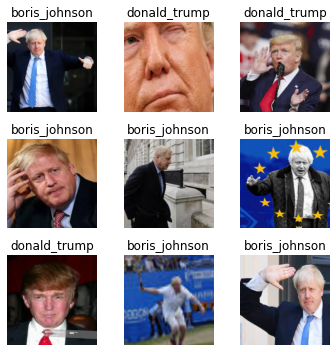

In [22]:
#making sure the data's alright
data.show_batch(rows=3, figsize=(5, 5))

#Training : ResNet50

In [0]:
#downloading the resnet50 model
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [24]:
#fitting first without tweaking
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.889775,0.572696,0.130435,00:09
1,0.701332,0.378979,0.113043,00:09
2,0.535215,0.321720,0.104348,00:09
3,0.436249,0.331142,0.121739,00:09


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


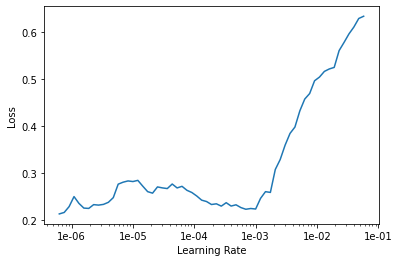

In [25]:
#relearning by finding appropriate learning rate
learn.unfreeze() 
learn.lr_find()
learn.recorder.plot()

In [27]:
#fitting again with new parameters
learn.unfreeze()
learn.fit_one_cycle(8, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.044048,0.096135,0.052174,00:09
1,0.043905,0.486724,0.086957,00:09
2,0.070322,0.079655,0.017391,00:09
3,0.077491,0.060138,0.017391,00:09
4,0.086761,0.009754,0.008696,00:09
5,0.076729,0.017987,0.008696,00:09
6,0.067487,0.050654,0.017391,00:09
7,0.054333,0.030753,0.017391,00:09


In [0]:
#saving results
learn.save('stage-1')

#Interpreting Results

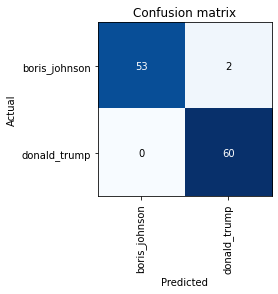

In [29]:
interpret = ClassificationInterpretation.from_learner(learn)
interpret.plot_confusion_matrix()

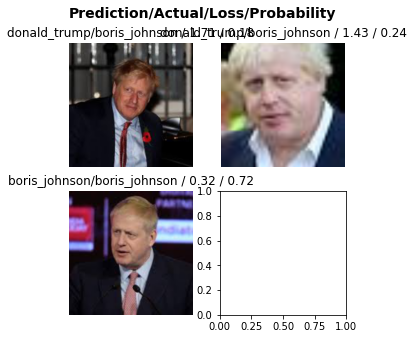

In [30]:
interpret.plot_top_losses(3, figsize=(5,5))

In [31]:
learn.data.classes

['boris_johnson', 'donald_trump']

In [33]:
learn.path

PosixPath('/content/donaldTrump-borisJohnson-classifier/dataset')

In [35]:
learn.model_dir

'models'